In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from zipfile import ZipFile
from scipy.stats import chi2_contingency
plt.rcParams['figure.figsize'] = (8, 6)

In [199]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [200]:
df = pd.read_pickle("./Data/avpat.pickle")
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE
0,10000001,F,810000001,White British,A,2017-01-17
1,10000002,F,810000002,NaN,A,2017-01-14
2,10000003,M,810000003,White British,A,2017-01-17
3,10000004,M,810000004,White British,A,2017-01-13
4,10000005,F,810000005,NaN,A,2017-01-16


In [201]:
# df = pd.read_csv("./Data/avpat.csv", sep = "^", index_col = 0)
# df.head()

In [202]:
df.shape

(982482, 6)

In [203]:
zf = ZipFile('../../Data/sim_av_tumour.zip')
csv = zf.open('sim_av_tumour.csv')
avtum = pd.read_csv(csv)
avtum.head()

/home/elsa/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,6,8,9,17,18,20,22,26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,SEX,CREG_CODE,LINKNUMBER,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,2,L0801,810000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,2,L0301,810000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,1,L0401,810000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,1,L1001,810000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,2,L0401,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [204]:
avtum.shape

(1402817, 34)

In [205]:
print("The original dataset has data for %d patients" % len(avtum))
print("After removing duplicates, the dataset has data for %d patients" % len(avtum.drop_duplicates()))

The original dataset has data for 1402817 patients
After removing duplicates, the dataset has data for 1402817 patients


In [206]:
df = df.merge(avtum, left_on = 'PATIENTID', right_on = 'PATIENTID', how = 'left')
df.head()

,PATIENTID,SEX_x,LINKNUMBER_x,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,SEX_y,CREG_CODE,LINKNUMBER_y,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,F,810000001,White British,A,2017-01-17,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,2,L0801,810000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,F,810000002,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,2,L0301,810000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,M,810000003,White British,A,2017-01-17,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,1,L0401,810000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,M,810000004,White British,A,2017-01-13,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,1,L1001,810000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,F,810000005,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,2,L0401,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [207]:
df.shape

(1039893, 39)

In [208]:
df = df.drop(['SEX_y',"LINKNUMBER_y"], axis = 1)
df.head()

,PATIENTID,SEX_x,LINKNUMBER_x,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,CREG_CODE,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,F,810000001,White British,A,2017-01-17,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,L0801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,F,810000002,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,L0301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,M,810000003,White British,A,2017-01-17,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,M,810000004,White British,A,2017-01-13,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,F,810000005,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [209]:
df.rename(columns={'SEX_x': 'SEX', 'LINKNUMBER_x': 'LINKNUMBER'}, inplace=True)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,CREG_CODE,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,F,810000001,White British,A,2017-01-17,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,L0801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,F,810000002,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,L0301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,M,810000003,White British,A,2017-01-17,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,M,810000004,White British,A,2017-01-13,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,F,810000005,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [210]:
df.shape

(1039893, 37)

In [211]:
df.dtypes

PATIENTID                      int64
SEX                         category
LINKNUMBER                     int64
ETHNICITY                   category
NEWVITALSTATUS              category
VITALSTATUSDATE               object
TUMOURID                       int64
DIAGNOSISDATEBEST             object
SITE_ICD10_O2                 object
SITE_ICD10_O2_3CHAR           object
MORPH_ICD10_O2                object
BEHAVIOUR_ICD10_O2            object
T_BEST                        object
N_BEST                        object
M_BEST                        object
STAGE_BEST                    object
STAGE_BEST_SYSTEM            float64
GRADE                         object
AGE                            int64
CREG_CODE                     object
SCREENINGSTATUSFULL_CODE      object
ER_STATUS                     object
ER_SCORE                     float64
PR_STATUS                     object
PR_SCORE                     float64
HER2_STATUS                   object
CANCERCAREPLANINTENT          object
P

In [212]:
df.isna().sum()

PATIENTID                         0
SEX                               0
LINKNUMBER                        0
ETHNICITY                    152279
NEWVITALSTATUS                    0
VITALSTATUSDATE                   0
TUMOURID                          0
DIAGNOSISDATEBEST                 0
SITE_ICD10_O2                   355
SITE_ICD10_O2_3CHAR             326
MORPH_ICD10_O2                  344
BEHAVIOUR_ICD10_O2              271
T_BEST                       577404
N_BEST                       665001
M_BEST                       683043
STAGE_BEST                        7
STAGE_BEST_SYSTEM            571423
GRADE                         46548
AGE                               0
CREG_CODE                         0
SCREENINGSTATUSFULL_CODE     942352
ER_STATUS                    938849
ER_SCORE                     992769
PR_STATUS                    975294
PR_SCORE                    1013416
HER2_STATUS                  952320
CANCERCAREPLANINTENT         751923
PERFORMANCESTATUS           

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039893 entries, 0 to 1039892
Data columns (total 37 columns):
PATIENTID                   1039893 non-null int64
SEX                         1039893 non-null category
LINKNUMBER                  1039893 non-null int64
ETHNICITY                   887614 non-null category
NEWVITALSTATUS              1039893 non-null category
VITALSTATUSDATE             1039893 non-null object
TUMOURID                    1039893 non-null int64
DIAGNOSISDATEBEST           1039893 non-null object
SITE_ICD10_O2               1039538 non-null object
SITE_ICD10_O2_3CHAR         1039567 non-null object
MORPH_ICD10_O2              1039549 non-null object
BEHAVIOUR_ICD10_O2          1039622 non-null object
T_BEST                      462489 non-null object
N_BEST                      374892 non-null object
M_BEST                      356850 non-null object
STAGE_BEST                  1039886 non-null object
STAGE_BEST_SYSTEM           468470 non-null float64
GRAD

In [214]:
df.count()

PATIENTID                   1039893
SEX                         1039893
LINKNUMBER                  1039893
ETHNICITY                    887614
NEWVITALSTATUS              1039893
VITALSTATUSDATE             1039893
TUMOURID                    1039893
DIAGNOSISDATEBEST           1039893
SITE_ICD10_O2               1039538
SITE_ICD10_O2_3CHAR         1039567
MORPH_ICD10_O2              1039549
BEHAVIOUR_ICD10_O2          1039622
T_BEST                       462489
N_BEST                       374892
M_BEST                       356850
STAGE_BEST                  1039886
STAGE_BEST_SYSTEM            468470
GRADE                        993345
AGE                         1039893
CREG_CODE                   1039893
SCREENINGSTATUSFULL_CODE      97541
ER_STATUS                    101044
ER_SCORE                      47124
PR_STATUS                     64599
PR_SCORE                      26477
HER2_STATUS                   87573
CANCERCAREPLANINTENT         287970
PERFORMANCESTATUS           

In [215]:
df.columns

Index(['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS',
       'VITALSTATUSDATE', 'TUMOURID', 'DIAGNOSISDATEBEST', 'SITE_ICD10_O2',
       'SITE_ICD10_O2_3CHAR', 'MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2', 'T_BEST',
       'N_BEST', 'M_BEST', 'STAGE_BEST', 'STAGE_BEST_SYSTEM', 'GRADE', 'AGE',
       'CREG_CODE', 'SCREENINGSTATUSFULL_CODE', 'ER_STATUS', 'ER_SCORE',
       'PR_STATUS', 'PR_SCORE', 'HER2_STATUS', 'CANCERCAREPLANINTENT',
       'PERFORMANCESTATUS', 'CNS', 'ACE27', 'GLEASON_PRIMARY',
       'GLEASON_SECONDARY', 'GLEASON_TERTIARY', 'GLEASON_COMBINED',
       'DATE_FIRST_SURGERY', 'LATERALITY', 'QUINTILE_2015'],
      dtype='object')

In [216]:
columns_selected = ['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS', 'VITALSTATUSDATE', 'TUMOURID',
        'DIAGNOSISDATEBEST','SITE_ICD10_O2','SITE_ICD10_O2_3CHAR', 'BEHAVIOUR_ICD10_O2', 'T_BEST',
        'N_BEST', 'M_BEST','STAGE_BEST', 'GRADE', 'AGE', 
        'CREG_CODE', 'ER_STATUS', 'PR_STATUS', 'HER2_STATUS', 'CANCERCAREPLANINTENT',
        'PERFORMANCESTATUS', 'ACE27', 'DATE_FIRST_SURGERY', 'LATERALITY', 'QUINTILE_2015']
df = df[columns_selected]
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,F,810000001,White British,A,2017-01-17,10000001,2015-11-06,C443,C44,3,NaN,NaN,NaN,?,GX,90,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,F,810000002,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,3,NaN,NaN,NaN,?,GX,84,L0301,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,M,810000003,White British,A,2017-01-17,10000003,2013-01-30,C449,C44,3,NaN,NaN,NaN,?,GX,68,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,M,810000004,White British,A,2017-01-13,10000004,2015-09-15,C449,C44,3,NaN,NaN,NaN,?,GX,69,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,F,810000005,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,3,NaN,NaN,NaN,U,GX,58,L0401,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [217]:
df = df[df['SITE_ICD10_O2_3CHAR'] == 'C18']
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C61,C18,3,NaN,NaN,NaN,?,GX,79,L1001,NaN,NaN,NaN,NaN,2,NaN,2013-07-05,8,4
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C449,C18,3,NaN,NaN,NaN,?,G2,86,L1701,NaN,NaN,NaN,9,0,NaN,2014-10-23,8,1 - least deprived
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C251,C18,3,4,0,0,3B,G2,77,L0801,NaN,NaN,P,Z,0,NaN,2014-01-08,8,3
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C180,C18,3,2c,2,0,2,GX,62,L1001,NaN,NaN,NaN,Cm,0,NaN,NaN,8,1 - least deprived
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C20,C18,3,1,1a,0,1,G2,63,L1001,NaN,NaN,NaN,9,0,NaN,2015-12-19,8,3


In [218]:
df.shape

(34351, 27)

In [219]:
df.isna().sum()

PATIENTID                   0
SEX                         0
LINKNUMBER                  0
ETHNICITY                2008
NEWVITALSTATUS              0
VITALSTATUSDATE             0
TUMOURID                    0
DIAGNOSISDATEBEST           0
SITE_ICD10_O2              13
SITE_ICD10_O2_3CHAR         0
BEHAVIOUR_ICD10_O2          5
T_BEST                   6203
N_BEST                   6472
M_BEST                   5173
STAGE_BEST                  0
GRADE                     193
AGE                         0
CREG_CODE                   0
ER_STATUS               34238
PR_STATUS               34287
HER2_STATUS             34249
CANCERCAREPLANINTENT    19807
PERFORMANCESTATUS       20610
ACE27                   31240
DATE_FIRST_SURGERY       5808
LATERALITY                  1
QUINTILE_2015               0
dtype: int64

In [220]:
df = df.drop(['ER_STATUS', 'PR_STATUS', 'HER2_STATUS', 'ACE27'], axis = 1)

In [221]:
original_memory = df.memory_usage(deep=True).sum() / 1024**2 
print('Memory used: %.1f MB' % original_memory)

Memory used: 32.5 MB


In [222]:
df['PATIENTID'].value_counts().sort_values(ascending = False).head(10)

60013603    3
60057038    3
60014808    3
60008073    3
60057597    3
60020373    3
60045118    3
60016175    3
60019369    3
60011935    3
Name: PATIENTID, dtype: int64

In [223]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') == 3].sort_values(by='PATIENTID').head(10)

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
578861,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C187,C18,3,3,1,0,3,G2,73,L1001,NaN,NaN,2015-03-14,8,3
578862,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C182,C18,3,4b,2,0,3A,G2,74,L1001,NaN,NaN,2015-03-13,8,3
578863,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C183,C18,3,2a,2,0,3,G2,74,L1001,NaN,NaN,2015-03-13,8,3
579395,60009354,F,860009354,White British,A,2017-01-16,60009354,2013-05-14,C182,C18,3,3,2,0,3,G2,67,L0201,NaN,NaN,2013-05-14,8,5 - most deprived
579396,60009354,F,860009354,White British,A,2017-01-16,60065014,2013-05-14,C449,C18,3,4b,0,0,2,GX,68,L0201,NaN,NaN,2013-05-14,8,5 - most deprived
579397,60009354,F,860009354,White British,A,2017-01-16,60068675,2013-05-16,C187,C18,3,3,1,0,3,G2,69,L0201,NaN,NaN,2013-06-10,8,5 - most deprived
580396,60011935,M,860011935,White British,A,2017-01-16,60011935,2013-12-30,C182,C18,3,4a,1,NaN,?,G2,82,L0801,NaN,NaN,2013-12-30,8,2
580397,60011935,M,860011935,White British,A,2017-01-16,60065191,2013-12-30,C186,C18,3,4,NaN,1,4,G2,82,L0801,9,1,NaN,8,2
580398,60011935,M,860011935,White British,A,2017-01-16,60068687,2014-09-25,C182,C18,3,NaN,NaN,NaN,?,G1,82,L0801,NaN,NaN,NaN,8,2
581076,60013603,F,860013603,White British,A,2017-01-16,60068696,2015-08-07,C449,C18,3,NaN,NaN,NaN,?,G3,77,L0801,NaN,NaN,2015-08-07,8,3


In [224]:
df['NUMBER_TUMOURS'] = df.groupby('PATIENTID')['PATIENTID'].transform('size')
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C61,C18,3,NaN,NaN,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4,1
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C449,C18,3,NaN,NaN,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C251,C18,3,4,0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3,1
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C180,C18,3,2c,2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C20,C18,3,1,1a,0,1,G2,63,L1001,9,0,2015-12-19,8,3,1


In [225]:
df['NUMBER_TUMOURS'].value_counts()

1    33044
2     1262
3       45
Name: NUMBER_TUMOURS, dtype: int64

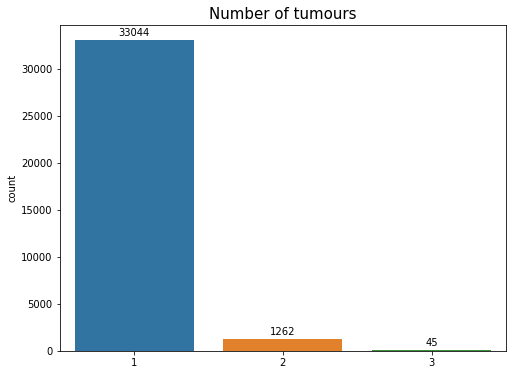

In [226]:
ax = sns.countplot(data = df, x = 'NUMBER_TUMOURS')
ax.set_title('Number of tumours', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha="center")

In [227]:
df['ETHNICITY'].value_counts()

White British                    29481
Other white background             981
White Irish                        353
Other ethnic group                 295
Asian Indian                       257
Black Caribbean                    250
Other Asian background             144
Black African                      134
Asian Pakistani                    132
Chinese                             94
Other black background              83
Asian Bangladeshi                   44
Other mixed background              32
White and black Caribbean           22
Mixed white and Asian               18
Mixed white and black African       14
White                                7
Other                                2
Name: ETHNICITY, dtype: int64

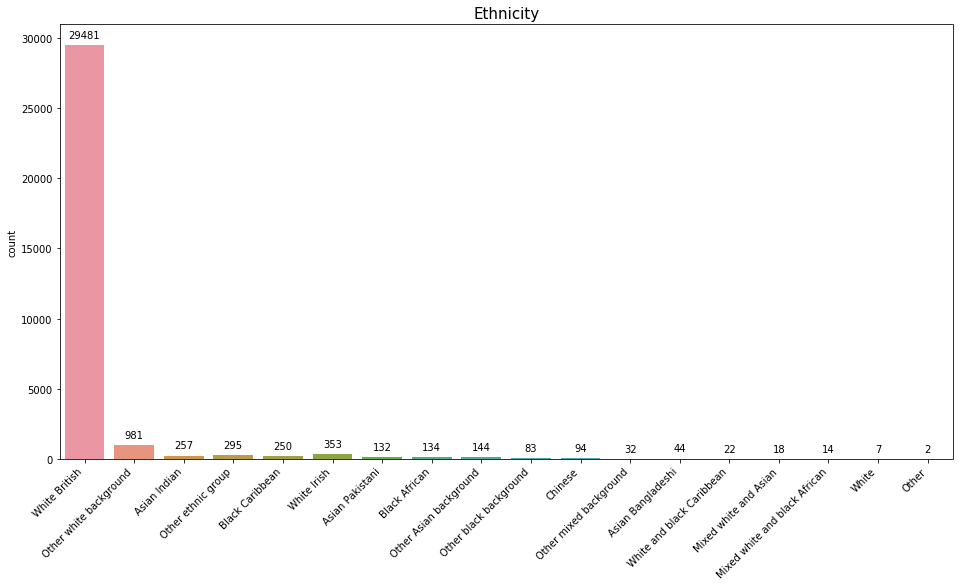

In [228]:
ax = sns.countplot(data = df, x = 'ETHNICITY', order = ['White British','Other white background','Asian Indian', 
                                                       'Other ethnic group','Black Caribbean','White Irish','Asian Pakistani',
                                                       'Black African','Other Asian background','Other black background',
                                                       'Chinese','Other mixed background','Asian Bangladeshi',
                                                       'White and black Caribbean','Mixed white and Asian',
                                                       'Mixed white and black African','White','Other'])
plt.gcf().set_size_inches(16,8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_title('Ethnicity', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha="center")

In [229]:
df['NEWVITALSTATUS'].value_counts()

A    25861
D     8490
Name: NEWVITALSTATUS, dtype: int64

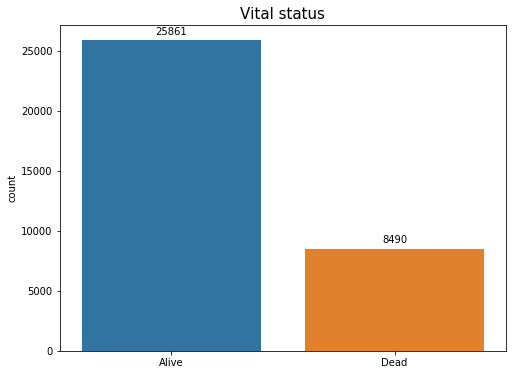

In [230]:
ax = sns.countplot(data = df, x = 'NEWVITALSTATUS')
ax.set_xticklabels(['Alive', 'Dead'])
ax.set_title('Vital status', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha="center")

In [231]:
df['SITE_ICD10_O2'].value_counts()

C187    10490
C180     7043
C182     4690
C184     2948
C189     1770
C183     1617
C186     1487
C185     1199
C181     1075
C20       525
C188      178
C61       156
C449      134
C19        94
D010       55
C445       48
C444       46
C679       40
D090       39
C541       37
D012       30
C833       25
C911       23
C259       21
C250       21
C159       20
C539       16
C155       16
D373       16
C900       14
C210       12
C920       12
C220       11
C80        11
C73        10
C450        9
C443        9
C830        9
C440        9
C169        9
D069        9
C821        8
C857        8
C211        8
D414        7
D371        7
C031        7
C519        7
C221        7
D320        7
C172        7
C829        6
C23         6
C154        6
C859        6
C162        6
C838        6
C160        5
C341        5
C179        5
C021        5
D471        5
C062        5
C435        5
D071        4
C674        4
C680        4
C927        4
C241        4
C170        4
C442        4
D469  

In [232]:
df['SITE_ICD10_O2'] = df['SITE_ICD10_O2'].astype(str)
def site_icd(value):
    if value == 'C189' or value == 'nan': #C189 is deleted since it means 'unspecified'
        return np.nan
    elif value == 'C180':
        return 'C180 Malignant neoplasm of cecum'
    elif value == 'C181':
        return 'C181 Malignant neoplasm of appendix'
    elif value == 'C182':
        return 'C182 Malignant neoplasm of ascending colon'
    elif value == 'C183':
        return 'C183 Malignant neoplasm of hepatic flexure'
    elif value == 'C184':
        return 'C184 Malignant neoplasm of transverse colon'
    elif value == 'C185':
        return 'C185 Malignant neoplasm of splenic flexure'
    elif value == 'C186':
        return 'C186 Malignant neoplasm of descending colon'
    elif value == 'C187':
        return 'C187 Malignant neoplasm of sigmoid colon'
    elif value == 'C188':
        return 'C188 Malignant neoplasm of overlapping sites of colon'
    else:
        return np.nan

df['SITE_ICD10_O2'] = df['SITE_ICD10_O2'].apply(site_icd)
df['SITE_ICD10_O2'].value_counts()

C187 Malignant neoplasm of sigmoid colon                 10490
C180 Malignant neoplasm of cecum                          7043
C182 Malignant neoplasm of ascending colon                4690
C184 Malignant neoplasm of transverse colon               2948
C183 Malignant neoplasm of hepatic flexure                1617
C186 Malignant neoplasm of descending colon               1487
C185 Malignant neoplasm of splenic flexure                1199
C181 Malignant neoplasm of appendix                       1075
C188 Malignant neoplasm of overlapping sites of colon      178
Name: SITE_ICD10_O2, dtype: int64

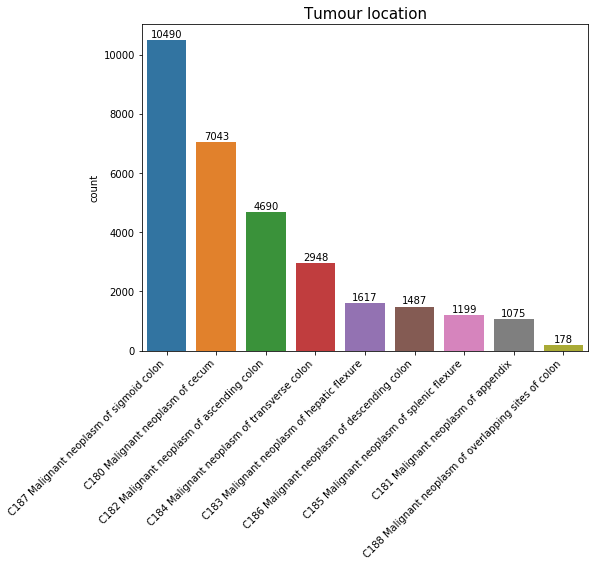

In [233]:
ax = sns.countplot(data = df, x = 'SITE_ICD10_O2', order = ['C187 Malignant neoplasm of sigmoid colon',
                                                           'C180 Malignant neoplasm of cecum',
                                                           'C182 Malignant neoplasm of ascending colon',
                                                           'C184 Malignant neoplasm of transverse colon',
                                                           'C183 Malignant neoplasm of hepatic flexure',
                                                           'C186 Malignant neoplasm of descending colon',
                                                           'C185 Malignant neoplasm of splenic flexure',
                                                           'C181 Malignant neoplasm of appendix',
                                                           'C188 Malignant neoplasm of overlapping sites of colon'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');
ax.set_title('Tumour location', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha="center")

In [234]:
df['SITE_ICD10_O2'] = df['SITE_ICD10_O2'].astype(str)
df['C180'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C180 Malignant neoplasm of cecum' in tumour for tumour in patient) else False)
df['C181'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C181 Malignant neoplasm of appendix' in tumour for tumour in patient) else False)
df['C182'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C182 Malignant neoplasm of ascending colon' in tumour for tumour in patient) else False)
df['C183'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C183 Malignant neoplasm of hepatic flexure' in tumour for tumour in patient) else False)
df['C184'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C184 Malignant neoplasm of transverse colon' in tumour for tumour in patient) else False)
df['C185'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C185 Malignant neoplasm of splenic flexure' in tumour for tumour in patient) else False)
df['C186'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C186 Malignant neoplasm of descending colon' in tumour for tumour in patient) else False)
df['C187'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C187 Malignant neoplasm of sigmoid colon' in tumour for tumour in patient) else False)
df['C188'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C188 Malignant neoplasm of overlapping sites of colon' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,nan,C18,3,NaN,NaN,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4,1,False,False,False,False,False,False,False,False,False
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,nan,C18,3,NaN,NaN,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,False,False,False,False,False,False,False,False,False
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,nan,C18,3,4,0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3,1,False,False,False,False,False,False,False,False,False
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C180 Malignant neoplasm of cecum,C18,3,2c,2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1,True,False,False,False,False,False,False,False,False
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,nan,C18,3,1,1a,0,1,G2,63,L1001,9,0,2015-12-19,8,3,1,False,False,False,False,False,False,False,False,False


In [235]:
df[df['PATIENTID'] == 60008073]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188
578861,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C187 Malignant neoplasm of sigmoid colon,C18,3,3,1,0,3,G2,73,L1001,NaN,NaN,2015-03-14,8,3,3,False,False,True,True,False,False,False,True,False
578862,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C182 Malignant neoplasm of ascending colon,C18,3,4b,2,0,3A,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,False,False,True,True,False,False,False,True,False
578863,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C183 Malignant neoplasm of hepatic flexure,C18,3,2a,2,0,3,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,False,False,True,True,False,False,False,True,False


In [236]:
df = df.drop(['SITE_ICD10_O2'], axis = 1)

In [237]:
df['BEHAVIOUR_ICD10_O2'].value_counts()

3      26097
3.0     8176
2         41
1.0        9
0          4
1          4
5          4
XXX        3
9          2
6.0        2
6          2
2.0        2
Name: BEHAVIOUR_ICD10_O2, dtype: int64

In [238]:
df['BEHAVIOUR_ICD10_O2'] = df['BEHAVIOUR_ICD10_O2'].astype(str)
def behaviour(value):
    if value.startswith('0'):
        return 'Benign'
    elif value.startswith('1'):
        return 'Uncertain'
    elif value.startswith('2'):
        return 'In situ'
    elif value.startswith('3'):
        return 'Malignant'
    elif value.startswith('5'):
        return 'Micro-invasive'
    elif value.startswith('X') or value.startswith('6') or value.startswith('9') or value == 'nan':
        return np.nan
    else:
        return value

df['BEHAVIOUR_ICD10_O2'] = df['BEHAVIOUR_ICD10_O2'].apply(behaviour)
df['BEHAVIOUR_ICD10_O2'].value_counts()

Malignant         34273
In situ              43
Uncertain            13
Micro-invasive        4
Benign                4
Name: BEHAVIOUR_ICD10_O2, dtype: int64

In [239]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['BEHAVIOUR_ICD10_O2'])
contingency

BEHAVIOUR_ICD10_O2,Benign,In situ,Malignant,Micro-invasive,Uncertain
NEWVITALSTATUS,,,,,
A,4,42,25789,4,10
D,0,1,8484,0,3


In [240]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0065218701262190265


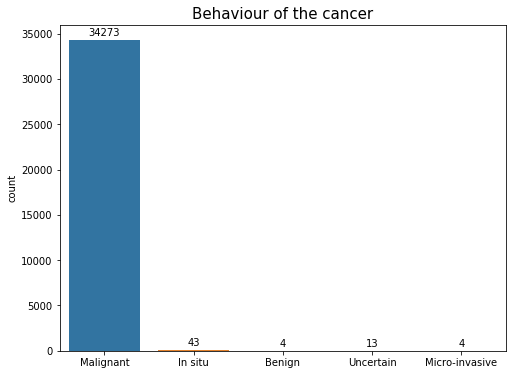

In [241]:
ax = sns.countplot(data = df, x = 'BEHAVIOUR_ICD10_O2')
ax.set_title('Behaviour of the cancer', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+300, height, ha="center")

In [242]:
df['BEHAVIOUR_ICD10_O2'] = df['BEHAVIOUR_ICD10_O2'].astype(str)
df['BEH_BENIGN'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('Benign' in tumour for tumour in patient) else False)
df['BEH_MALIG'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('Malignant' in tumour for tumour in patient) else False)
df['BEH_MICINV'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('Micro-invasive' in tumour for tumour in patient) else False)
df['BEH_INSITU'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('In situ' in tumour for tumour in patient) else False)
df['BEH_UNCERT'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('Uncertain' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,Malignant,NaN,NaN,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,Malignant,NaN,NaN,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,Malignant,4,0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,Malignant,2c,2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,Malignant,1,1a,0,1,G2,63,L1001,9,0,2015-12-19,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [243]:
df[df['PATIENTID'] == 60008073]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT
578861,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C18,Malignant,3,1,0,3,G2,73,L1001,NaN,NaN,2015-03-14,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False
578862,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C18,Malignant,4b,2,0,3A,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False
578863,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C18,Malignant,2a,2,0,3,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False


In [244]:
df = df.drop(['BEHAVIOUR_ICD10_O2'], axis = 1)

In [245]:
df['T_BEST'].value_counts()

3      12995
4       4050
2       3420
4b      3081
1       2800
4a       871
1a       183
3a       163
3b       110
1b        88
2a        88
1c        76
2c        62
3c        41
is        27
a         23
2b        22
3d        10
0          9
1mi        7
1d         5
3s         4
2d         3
4d         2
4c         2
2s         2
X          1
T2         1
2a2        1
1a1        1
Name: T_BEST, dtype: int64

In [246]:
df['T_BEST'] = df['T_BEST'].astype('str')
def T_best(value):
    if value.startswith('0'):
        return '0'
    elif value.startswith('1') or value == 'T1':
        return '1'
    elif value.startswith('2') or value == 'T2':
        return '2'
    elif value.startswith('3'):
        return '3'
    elif value.startswith('4'):
        return '4'
    elif value == 'X' or value == 'IS' or value == 'is' or value == 'a' or value == 'nan':
        return np.nan
    else:
        return value

df['T_BEST'] = df['T_BEST'].apply(T_best)
df['T_BEST'].value_counts()

3    13323
4     8006
2     3599
1     3160
0        9
Name: T_BEST, dtype: int64

In [247]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['T_BEST'])
contingency

T_BEST,0,1,2,3,4
NEWVITALSTATUS,,,,,
A,7,2880,3184,10709,5737
D,2,280,415,2614,2269


In [248]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

4.710660992431486e-163


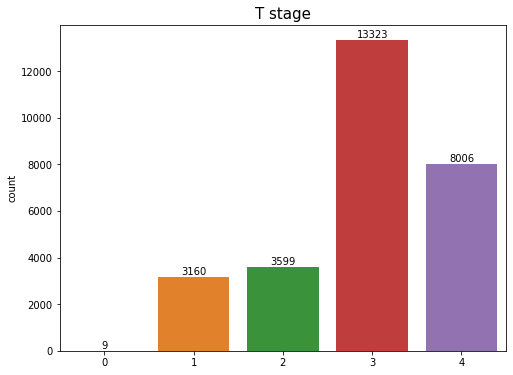

In [249]:
ax = sns.countplot(data = df, x = 'T_BEST', order = ['0', '1', '2', '3', '4'])
ax.set_title('T stage', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha="center")

In [250]:
df['T_BEST'] = df['T_BEST'].astype(str)
df['T0'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: True if any('0' in tumour for tumour in patient) else False)
df['T1'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: True if any('1' in tumour for tumour in patient) else False)
df['T2'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: True if any('2' in tumour for tumour in patient) else False)
df['T3'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: True if any('3' in tumour for tumour in patient) else False)
df['T4'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: True if any('4' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,nan,NaN,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,nan,NaN,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,4,0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,2,2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,1,1a,0,1,G2,63,L1001,9,0,2015-12-19,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


In [251]:
df[df['PATIENTID'] == 60008073]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4
578861,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C18,3,1,0,3,G2,73,L1001,NaN,NaN,2015-03-14,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,True
578862,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C18,4,2,0,3A,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,True
578863,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C18,2,2,0,3,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,True


In [252]:
df = df.drop(['T_BEST'], axis = 1)

In [253]:
df['N_BEST'].value_counts()

0      16163
1       6890
2       4323
1b       134
2a       106
2b       102
1a        81
3         44
1c        21
2c         5
1mi        4
X          3
3a         2
N0         1
Name: N_BEST, dtype: int64

In [254]:
df['N_BEST'] = df['N_BEST'].astype('str')
def N_best(value):
    if value.startswith('0') or value == 'N0':
        return '0'
    elif value.startswith('1'):
        return '1'
    elif value.startswith('2'):
        return '2'
    elif value.startswith('3'):
        return '3'
    elif value == 'X' or value == 'nan':
        return np.nan
    else:
        return value

df['N_BEST'] = df['N_BEST'].apply(N_best)
df['N_BEST'].value_counts()

0    16164
1     7130
2     4536
3       46
Name: N_BEST, dtype: int64

In [255]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['N_BEST'])
contingency

N_BEST,0,1,2,3
NEWVITALSTATUS,,,,
A,14169,5071,2988,31
D,1995,2059,1548,15


In [256]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


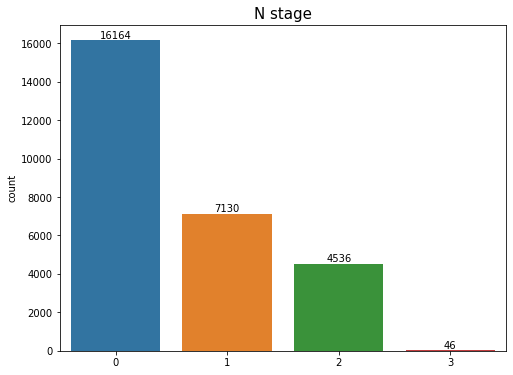

In [257]:
ax = sns.countplot(data = df, x = 'N_BEST', order = ['0', '1', '2', '3'])
ax.set_title('N stage', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha="center")

In [258]:
df['N_BEST'] = df['N_BEST'].astype(str)
df['N0'] = df.groupby('PATIENTID')['N_BEST'].transform(lambda patient: True if any('0' in tumour for tumour in patient) else False)
df['N1'] = df.groupby('PATIENTID')['N_BEST'].transform(lambda patient: True if any('1' in tumour for tumour in patient) else False)
df['N2'] = df.groupby('PATIENTID')['N_BEST'].transform(lambda patient: True if any('2' in tumour for tumour in patient) else False)
df['N3'] = df.groupby('PATIENTID')['N_BEST'].transform(lambda patient: True if any('3' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,nan,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,nan,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,1,0,1,G2,63,L1001,9,0,2015-12-19,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False


In [259]:
df[df['PATIENTID'] == 60008073]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3
578861,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C18,1,0,3,G2,73,L1001,NaN,NaN,2015-03-14,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,True,False,True,True,False
578862,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C18,2,0,3A,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,True,False,True,True,False
578863,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C18,2,0,3,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,True,False,True,True,False


In [260]:
df = df.drop(['N_BEST'], axis = 1)

In [261]:
df['M_BEST'].value_counts()

0     22753
1      6007
1b      221
1a      185
X        11
1c        1
Name: M_BEST, dtype: int64

In [262]:
df['M_BEST'] = df['M_BEST'].astype('str')
def M_best(value):
    if value.startswith('0'):
        return '0'
    elif value.startswith('1'):
        return '1'
    elif value == 'X' or value == 'nan':
        return np.nan
    else:
        return value

df['M_BEST'] = df['M_BEST'].apply(M_best)
df['M_BEST'].value_counts()

0    22753
1     6414
Name: M_BEST, dtype: int64

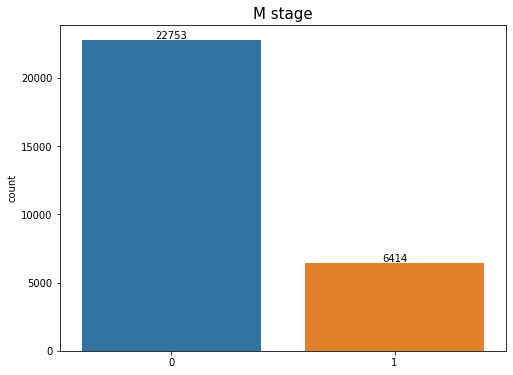

In [263]:
ax = sns.countplot(data = df, x = 'M_BEST', order = ['0', '1'])
ax.set_title('M stage', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha="center")

In [264]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['M_BEST'])
contingency

M_BEST,0,1
NEWVITALSTATUS,,
A,19797,2576
D,2956,3838


In [265]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [266]:
df['M_BEST'] = df['M_BEST'].astype(str)
df['M1'] = df.groupby('PATIENTID')['M_BEST'].transform(lambda patient: True if any('1' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,nan,?,GX,79,L1001,NaN,2,2013-07-05,8,4,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,nan,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,0,1,G2,63,L1001,9,0,2015-12-19,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False


In [267]:
df = df.drop(['M_BEST'], axis = 1)

In [268]:
df['STAGE_BEST'].value_counts()

2      9032
3      7564
4      6474
1      4944
?      4419
2A      488
3B      374
1A      185
2B      176
3A      127
3C      115
U       106
4A       76
0        70
2C       69
1B       47
4B       38
3S        8
4S        8
1E        7
1S        7
2S        4
4C        3
1C        3
0A        3
1A2       1
0IS       1
1B2       1
2E        1
Name: STAGE_BEST, dtype: int64

In [269]:
df['STAGE_BEST'] = df['STAGE_BEST'].astype(str)
def stage_best(value):
    if value.startswith('0'):
        return 'Stage 0'
    elif value.startswith('1'):
        return 'Stage 1'
    elif value.startswith('2'):
        return 'Stage 2'
    elif value.startswith('3'):
        return 'Stage 3'
    elif value.startswith('4'):
        return 'Stage 4'
    elif value == '?' or value == 'U' or value == 'nan':
        return np.nan
    else:
        return value

df['STAGE_BEST'] = df['STAGE_BEST'].apply(stage_best)
df['STAGE_BEST'].value_counts()

Stage 2    9770
Stage 3    8188
Stage 4    6599
Stage 1    5195
Stage 0      74
Name: STAGE_BEST, dtype: int64

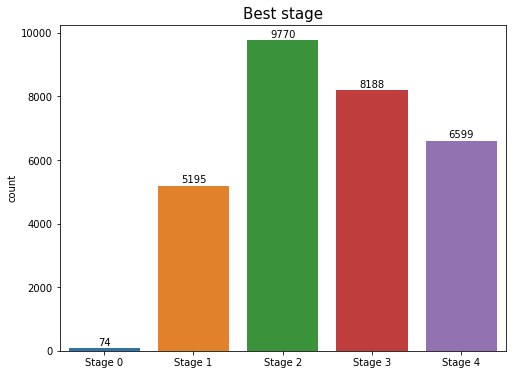

In [270]:
ax = sns.countplot(data = df, x = 'STAGE_BEST', order = ['Stage 0', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
ax.set_title('Best stage', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha='center')

In [271]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['STAGE_BEST'])
contingency

STAGE_BEST,Stage 0,Stage 1,Stage 2,Stage 3,Stage 4
NEWVITALSTATUS,,,,,
A,65,4885,8839,6673,2667
D,9,310,931,1515,3932


In [272]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [273]:
df['STAGE_BEST'] = df['STAGE_BEST'].astype(str)
df['STAGE0'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 0' in tumour for tumour in patient) else False)
df['STAGE1'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 1' in tumour for tumour in patient) else False)
df['STAGE2'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 2' in tumour for tumour in patient) else False)
df['STAGE3'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 3' in tumour for tumour in patient) else False)
df['STAGE4'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 4' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,nan,GX,79,L1001,NaN,2,2013-07-05,8,4,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,nan,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,Stage 3,G2,77,L0801,Z,0,2014-01-08,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,Stage 2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,Stage 1,G2,63,L1001,9,0,2015-12-19,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False


In [274]:
df[df['PATIENTID'] == 60008073]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4
578861,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C18,Stage 3,G2,73,L1001,NaN,NaN,2015-03-14,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,True,False
578862,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C18,Stage 3,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,True,False
578863,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C18,Stage 3,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,True,False


In [275]:
df = df.drop(['STAGE_BEST'], axis = 1)

In [276]:
df['GRADE'].value_counts()

G2    20748
GX     6534
G3     4720
G1     2088
G4       68
Name: GRADE, dtype: int64

In [277]:
df['GRADE'] = df['GRADE'].astype(str)
def grade(value):
    if value == 'GX' or value == 'nan':
        return np.nan
    else:
        return value

df['GRADE'] = df['GRADE'].apply(grade)
df['GRADE'].value_counts()

G2    20748
G3     4720
G1     2088
G4       68
Name: GRADE, dtype: int64

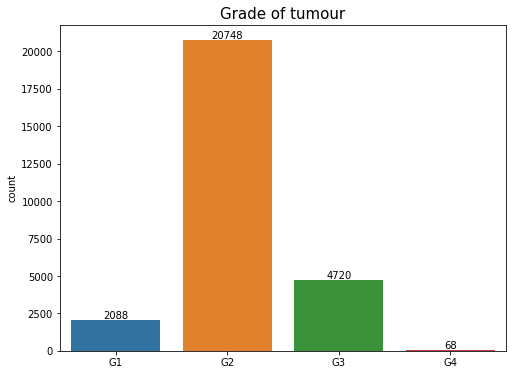

In [278]:
ax = sns.countplot(data = df, x = 'GRADE', order = ['G1', 'G2', 'G3', 'G4'])
ax.set_title('Grade of tumour', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha='center')

In [279]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['GRADE'])
contingency

GRADE,G1,G2,G3,G4
NEWVITALSTATUS,,,,
A,1916,17774,3298,36
D,172,2974,1422,32


In [280]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

7.375465246101255e-184


In [281]:
df['GRADE'] = df['GRADE'].astype(str)
df['GRADE1'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: True if any('G1' in tumour for tumour in patient) else False)
df['GRADE2'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: True if any('G2' in tumour for tumour in patient) else False)
df['GRADE3'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: True if any('G3' in tumour for tumour in patient) else False)
df['GRADE4'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: True if any('G4' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,nan,79,L1001,NaN,2,2013-07-05,8,4,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,G2,77,L0801,Z,0,2014-01-08,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,nan,62,L1001,Cm,0,NaN,8,1 - least deprived,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,G2,63,L1001,9,0,2015-12-19,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False


In [282]:
df[df['PATIENTID'] == 60008073]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4
578861,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C18,G2,73,L1001,NaN,NaN,2015-03-14,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,True,False,False,True,False,False
578862,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C18,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,True,False,False,True,False,False
578863,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C18,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,True,False,False,True,False,False


In [283]:
df = df.drop(['GRADE'], axis = 1)

In [284]:
df['AGE'].describe()

count    34351.000000
mean        70.950424
std         13.431867
min          0.000000
25%         64.000000
50%         73.000000
75%         81.000000
max        105.000000
Name: AGE, dtype: float64

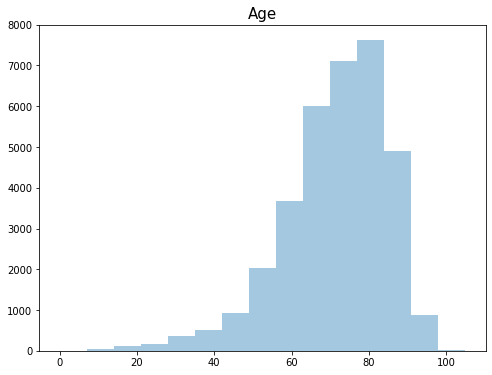

In [285]:
ax = sns.distplot(df['AGE'], hist = True, kde = False, bins = 15)
ax.set_title('Age', fontsize=15)
ax.set_xlabel('');

In [286]:
df['AGE'].sort_values().head(30)

1037858     0
934937      0
648475      3
587687      8
587841      8
597925      8
576648      8
586848      8
581986      9
593240      9
600033      9
593668     10
596401     10
583094     10
937298     10
598393     11
591581     11
594622     11
586508     11
577577     11
585046     11
585048     12
580563     12
575845     12
593082     12
941248     12
584255     13
596231     13
587901     13
586316     13
Name: AGE, dtype: int64

In [287]:
df['AGE_MEDIAN'] = df.groupby('PATIENTID')['AGE'].transform(np.median)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,79,L1001,NaN,2,2013-07-05,8,4,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,77,L0801,Z,0,2014-01-08,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,62,L1001,Cm,0,NaN,8,1 - least deprived,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,63,L1001,9,0,2015-12-19,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0


In [288]:
df['AGE_MEDIAN'].describe()

count    34351.000000
mean        70.949608
std         13.383003
min          0.000000
25%         64.000000
50%         73.000000
75%         81.000000
max        105.000000
Name: AGE_MEDIAN, dtype: float64

In [289]:
df = df.drop(['AGE'], axis = 1)

In [290]:
df['CREG_CODE'].value_counts()

L0801    6837
L1001    5358
L0201    4535
L1701    4511
L0401    4152
L1201    3742
L0301    3259
L0901    1957
Name: CREG_CODE, dtype: int64

In [291]:
def creg(value):
    if value == 'L0801':
        return 'L0801 Thames Cancer Registry'
    elif value == 'L0201':
        return 'L0201 Northern & Yorkshire Cancer Registry & Information Service'
    elif value == 'L0301':
        return 'L0301 Trent Cancer Registry'
    elif value == 'L1201':
        return 'L1201 West Midlands Cancer Intelligence Unit'
    elif value == 'L0401':
        return 'L0401 Eastern Cancer Registration & Information Centre'
    elif value == 'L1701':
        return 'L1701 North West Cancer Intelligence Service'
    elif value == 'L1001':
        return 'L1001 South West Cancer Intelligence Service'
    elif value == 'L0901':
        return 'L0901 Oxford Cancer Intelligence Unit'
    elif value == 'nan':
        return np.nan
    else:
        return value

df['CREG_CODE'] = df['CREG_CODE'].apply(creg)
df['CREG_CODE'].value_counts()

L0801 Thames Cancer Registry                                        6837
L1001 South West Cancer Intelligence Service                        5358
L0201 Northern & Yorkshire Cancer Registry & Information Service    4535
L1701 North West Cancer Intelligence Service                        4511
L0401 Eastern Cancer Registration & Information Centre              4152
L1201 West Midlands Cancer Intelligence Unit                        3742
L0301 Trent Cancer Registry                                         3259
L0901 Oxford Cancer Intelligence Unit                               1957
Name: CREG_CODE, dtype: int64

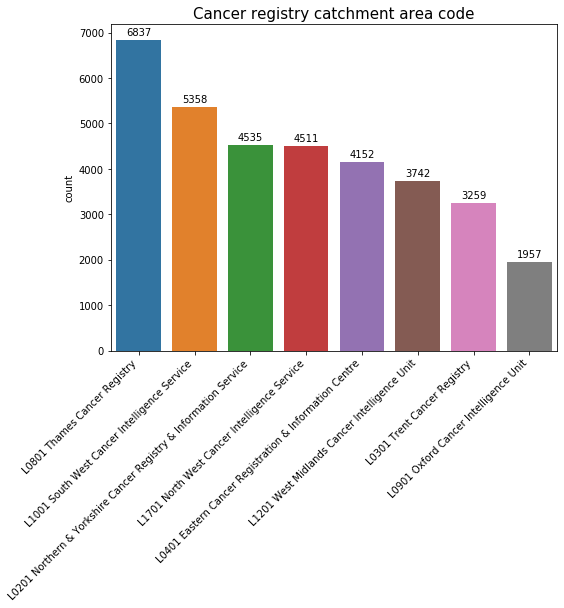

In [292]:
ax = sns.countplot(data = df, x = 'CREG_CODE', order=['L0801 Thames Cancer Registry',
                                                     'L1001 South West Cancer Intelligence Service',
                                                     'L0201 Northern & Yorkshire Cancer Registry & Information Service',
                                                     'L1701 North West Cancer Intelligence Service',                                                     
                                                     'L0401 Eastern Cancer Registration & Information Centre',
                                                     'L1201 West Midlands Cancer Intelligence Unit',                                                     
                                                     'L0301 Trent Cancer Registry',
                                                     'L0901 Oxford Cancer Intelligence Unit'])
ax.set_title('Cancer registry catchment area code', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha='center')

In [293]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['CREG_CODE'])
contingency

CREG_CODE,L0201 Northern & Yorkshire Cancer Registry & Information Service,L0301 Trent Cancer Registry,L0401 Eastern Cancer Registration & Information Centre,L0801 Thames Cancer Registry,L0901 Oxford Cancer Intelligence Unit,L1001 South West Cancer Intelligence Service,L1201 West Midlands Cancer Intelligence Unit,L1701 North West Cancer Intelligence Service
NEWVITALSTATUS,,,,,,,,
A,3378,2420,3194,5192,1496,4007,2807,3367
D,1157,839,958,1645,461,1351,935,1144


In [294]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.04635773439524783


In [295]:
df['L0801'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0801 Thames Cancer Registry' in tumour for tumour in patient) else False)
df['L1001'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L1001 South West Cancer Intelligence Service' in tumour for tumour in patient) else False)
df['L1701'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L1701 North West Cancer Intelligence Service' in tumour for tumour in patient) else False)
df['L0201'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0201 Northern & Yorkshire Cancer Registry & Information Service' in tumour for tumour in patient) else False)
df['L0401'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0401 Eastern Cancer Registration & Information Centre' in tumour for tumour in patient) else False)
df['L1201'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L1201 West Midlands Cancer Intelligence Unit' in tumour for tumour in patient) else False)
df['L0301'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0301 Trent Cancer Registry' in tumour for tumour in patient) else False)
df['L0901'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0901 Oxford Cancer Intelligence Unit' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,L1001 South West Cancer Intelligence Service,NaN,2,2013-07-05,8,4,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,L1701 North West Cancer Intelligence Service,9,0,2014-10-23,8,1 - least deprived,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,L0801 Thames Cancer Registry,Z,0,2014-01-08,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,L1001 South West Cancer Intelligence Service,Cm,0,NaN,8,1 - least deprived,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,L1001 South West Cancer Intelligence Service,9,0,2015-12-19,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False


In [296]:
df = df.drop(['CREG_CODE'], axis = 1)

In [297]:
df['CANCERCAREPLANINTENT'].value_counts()

C     9452
Z     2374
9     1840
X      656
Cm     187
Zm      35
Name: CANCERCAREPLANINTENT, dtype: int64

In [298]:
df['CANCERCAREPLANINTENT'] = df['CANCERCAREPLANINTENT'].astype(str)
def planintent(value):
    if value.startswith('C'):
        return 'Curative'
    elif value.startswith('Z'):
        return 'Non curative'
    elif value == 'X':
        return 'No active treatment'
    elif value == '9' or value == 'nan':
        return np.nan
    else:
        return value

df['CANCERCAREPLANINTENT'] = df['CANCERCAREPLANINTENT'].apply(planintent)
df['CANCERCAREPLANINTENT'].value_counts()

Curative               9639
Non curative           2409
No active treatment     656
Name: CANCERCAREPLANINTENT, dtype: int64

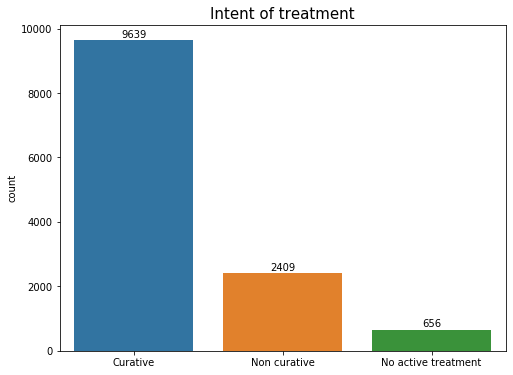

In [299]:
ax = sns.countplot(data = df, x = 'CANCERCAREPLANINTENT', order=['Curative','Non curative','No active treatment'])
ax.set_title('Intent of treatment', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha='center')

In [300]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['CANCERCAREPLANINTENT'])
contingency

CANCERCAREPLANINTENT,Curative,No active treatment,Non curative
NEWVITALSTATUS,,,
A,7222,495,1822
D,2417,161,587


In [301]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7529006314545236


In [302]:
df['CANCERCAREPLANINTENT'] = df['CANCERCAREPLANINTENT'].astype(str)
df['CURATIVE_TREAT'] = df.groupby('PATIENTID')['CANCERCAREPLANINTENT'].transform(lambda patient: True if any('Curative' in tumour for tumour in patient) else False)
df['NONCURATIVE_TREAT'] = df.groupby('PATIENTID')['CANCERCAREPLANINTENT'].transform(lambda patient: True if any('Non curative' in tumour for tumour in patient) else False)
df['NO_ACTIVE_TREAT'] = df.groupby('PATIENTID')['CANCERCAREPLANINTENT'].transform(lambda patient: True if any('No active treatment' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,nan,2,2013-07-05,8,4,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,nan,0,2014-10-23,8,1 - least deprived,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,Non curative,0,2014-01-08,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,Curative,0,NaN,8,1 - least deprived,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False,True,False,False
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,nan,0,2015-12-19,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False,False,False,False


In [303]:
df = df.drop(['CANCERCAREPLANINTENT'], axis = 1)

In [304]:
df['PERFORMANCESTATUS'].value_counts()

0     4670
9     3924
1     2721
2     1275
3      790
4      192
1m     111
2m      41
3m      14
4m       3
Name: PERFORMANCESTATUS, dtype: int64

In [305]:
df['PERFORMANCESTATUS'] = df['PERFORMANCESTATUS'].astype(str)
def perfstatus(value):
    if value.startswith('0'):
        return '0'
    elif value.startswith('1'):
        return '1'
    elif value.startswith('2'):
        return '2'
    elif value.startswith('3'):
        return '3'
    elif value.startswith('4'):
        return '4'
    elif value == '9' or value == 'nan':
        return np.nan
    else:
        return value

df['PERFORMANCESTATUS'] = df['PERFORMANCESTATUS'].apply(perfstatus)
df['PERFORMANCESTATUS'].value_counts()

0    4670
1    2832
2    1316
3     804
4     195
Name: PERFORMANCESTATUS, dtype: int64

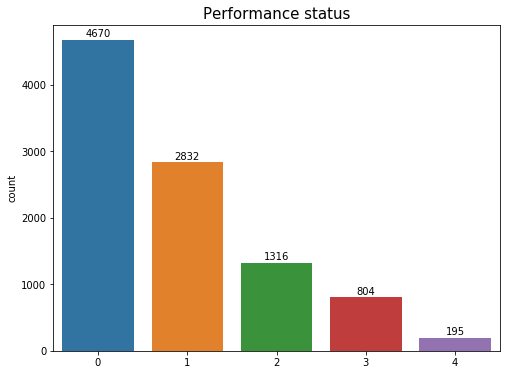

In [306]:
ax = sns.countplot(data = df, x = 'PERFORMANCESTATUS', order = ['0', '1', '2', '3', '4'])
ax.set_title('Performance status', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+50, height, ha='center')

In [307]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['PERFORMANCESTATUS'])
contingency

PERFORMANCESTATUS,0,1,2,3,4
NEWVITALSTATUS,,,,,
A,3491,2128,1008,622,156
D,1179,704,308,182,39


In [308]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.19445585754408334


In [309]:
df['PERFORMANCESTATUS'] = df['PERFORMANCESTATUS'].astype(str)
df['ECOG0'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('0' in tumour for tumour in patient) else False)
df['ECOG1'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('1' in tumour for tumour in patient) else False)
df['ECOG2'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('2' in tumour for tumour in patient) else False)
df['ECOG3'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('3' in tumour for tumour in patient) else False)
df['ECOG4'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('4' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,2,2013-07-05,8,4,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,0,2014-10-23,8,1 - least deprived,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,0,2014-01-08,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,0,NaN,8,1 - least deprived,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,0,2015-12-19,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [310]:
df = df.drop(['PERFORMANCESTATUS'], axis = 1)

In [311]:
pd.set_option('display.max_rows', 20) 

In [312]:
df['DATE_FIRST_SURGERY'].sort_values().dropna()

577075    1998-01-27
598333    2012-12-22
577121    2013-01-01
579646    2013-01-01
576490    2013-01-01
             ...    
586673    2016-09-18
274288    2016-09-24
621320    2016-10-04
579677    2016-10-10
590082    2016-11-02
Name: DATE_FIRST_SURGERY, Length: 28543, dtype: object

In [313]:
pd.set_option('display.max_rows', None) 

In [314]:
df['DATE_FIRST_SURGERY'] = pd.to_datetime(df['DATE_FIRST_SURGERY'])
df['DIAGNOSISDATEBEST'] = pd.to_datetime(df['DIAGNOSISDATEBEST'])
df['DIAG_TO_SURG'] = df['DATE_FIRST_SURGERY'] - df['DIAGNOSISDATEBEST']
df['DIAG_TO_SURG_DAYS'] = df['DIAG_TO_SURG'] / np.timedelta64(1, 'D')
df['DIAG_TO_SURG_MONTHS'] = df['DIAG_TO_SURG'] / np.timedelta64(1, 'M')
df['DIAG_TO_SURG_YEARS'] = df['DIAG_TO_SURG'] / np.timedelta64(1, 'Y')
df[['DIAGNOSISDATEBEST', 'DATE_FIRST_SURGERY', 'DIAG_TO_SURG_DAYS', 'DIAG_TO_SURG_MONTHS', 'DIAG_TO_SURG_YEARS']].head(10)

,DIAGNOSISDATEBEST,DATE_FIRST_SURGERY,DIAG_TO_SURG_DAYS,DIAG_TO_SURG_MONTHS,DIAG_TO_SURG_YEARS
865,2013-03-07,2013-07-05,120.0,3.942586,0.328549
990,2014-10-23,2014-10-23,0.0,0.000000,0.000000
1303,2014-01-08,2014-01-08,0.0,0.000000,0.000000
1683,2015-09-20,NaT,NaN,NaN,NaN
2079,2015-11-20,2015-12-19,29.0,0.952792,0.079399
2109,2014-12-17,2014-12-17,0.0,0.000000,0.000000
2316,2014-12-15,2014-12-15,0.0,0.000000,0.000000
2392,2015-05-04,NaT,NaN,NaN,NaN
2394,2013-11-28,NaT,NaN,NaN,NaN
2560,2015-04-15,2015-05-22,37.0,1.215631,0.101303


In [315]:
df['DIAG_TO_SURG_DAYS'].describe()

count    28543.000000
mean        15.746207
std         53.820459
min      -6295.000000
25%          0.000000
50%          0.000000
75%         23.000000
max        855.000000
Name: DIAG_TO_SURG_DAYS, dtype: float64

In [316]:
df['DIAG_TO_SURG_DAYS'].sort_values().head(40)

577075   -6295.0
593019     -65.0
581747     -63.0
593533     -62.0
581972     -62.0
781559     -51.0
588408     -50.0
941849     -37.0
598333     -37.0
581142     -37.0
599418     -37.0
773058     -36.0
589762     -36.0
935883     -35.0
586318     -35.0
590676     -35.0
598096     -34.0
598918     -31.0
577297     -29.0
588300     -29.0
935182     -29.0
940048     -27.0
592325     -25.0
660521     -25.0
583375     -25.0
592877     -25.0
599910     -25.0
783531     -19.0
827196     -17.0
593653     -16.0
580211     -16.0
235447     -14.0
582284     -13.0
935291     -12.0
943057     -12.0
596630      -8.0
935796      -8.0
585579      -8.0
583200      -8.0
600528      -7.0
Name: DIAG_TO_SURG_DAYS, dtype: float64

In [317]:
df['DIAG_TO_SURG_DAYS'].sort_values(ascending=False).head(40)

580138    855.0
591853    790.0
579677    729.0
586673    691.0
269071    620.0
593762    620.0
585930    591.0
773929    590.0
591688    578.0
590128    540.0
594281    517.0
484625    514.0
578559    512.0
577131    501.0
598822    500.0
592758    495.0
593904    488.0
940823    482.0
599233    481.0
594011    480.0
579091    479.0
593231    473.0
593187    444.0
464179    443.0
590102    429.0
587223    425.0
582817    419.0
586094    418.0
941878    418.0
584256    417.0
196773    402.0
578252    398.0
773914    395.0
941970    390.0
942459    389.0
581658    388.0
793436    384.0
940405    373.0
939739    371.0
585467    370.0
Name: DIAG_TO_SURG_DAYS, dtype: float64

/home/elsa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/elsa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


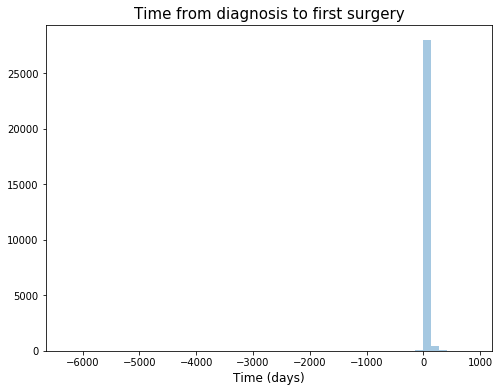

In [318]:
ax = sns.distplot(df['DIAG_TO_SURG_DAYS'], hist = True, kde = False, bins = 50)
ax.set_title('Time from diagnosis to first surgery', fontsize=15)
ax.set_xlabel('Time (days)', fontsize=12);

In [319]:
def diag_to_surg(value):
    if value < 0:
        return np.nan
    else:
        return value
df['DIAG_TO_SURG_DAYS'] = df['DIAG_TO_SURG_DAYS'].apply(diag_to_surg)    
df['DIAG_TO_SURG_DAYS'].describe()

count    28438.000000
mean        16.069871
std         38.767483
min          0.000000
25%          0.000000
50%          0.000000
75%         23.000000
max        855.000000
Name: DIAG_TO_SURG_DAYS, dtype: float64

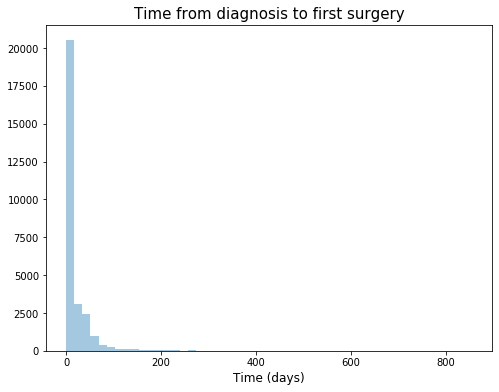

In [320]:
ax = sns.distplot(df['DIAG_TO_SURG_DAYS'], hist = True, kde = False, bins = 50)
ax.set_title('Time from diagnosis to first surgery', fontsize=15)
ax.set_xlabel('Time (days)', fontsize=12);

In [321]:
df['DIAG_TO_SURG_DAYS_MEDIAN'] = df.groupby('PATIENTID')['DIAG_TO_SURG_DAYS'].transform(np.median)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG,DIAG_TO_SURG_DAYS,DIAG_TO_SURG_MONTHS,DIAG_TO_SURG_YEARS,DIAG_TO_SURG_DAYS_MEDIAN
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,2013-07-05,8,4,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,120 days,120.0,3.942586,0.328549,120.0
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,2014-10-23,8,1 - least deprived,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,0 days,0.0,0.000000,0.000000,0.0
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,2014-01-08,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,0 days,0.0,0.000000,0.000000,0.0
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,NaT,8,1 - least deprived,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,NaT,NaN,NaN,NaN,NaN
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,2015-12-19,8,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,29 days,29.0,0.952792,0.079399,29.0


In [322]:
df['DIAG_TO_SURG_DAYS_MEDIAN'] = df['DIAG_TO_SURG_DAYS_MEDIAN'].fillna(df['DIAG_TO_SURG_DAYS_MEDIAN'].median())
df['DIAG_TO_SURG_DAYS_MEDIAN'].describe()

count    34351.000000
mean        13.371357
std         35.595322
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max        855.000000
Name: DIAG_TO_SURG_DAYS_MEDIAN, dtype: float64

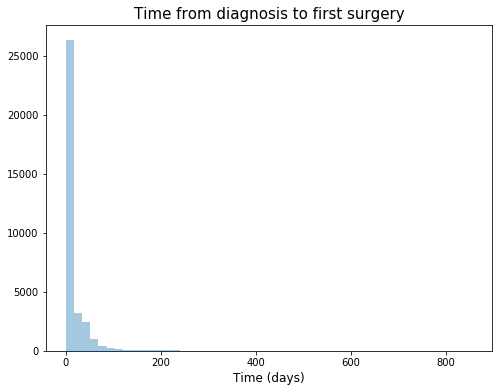

In [323]:
ax = sns.distplot(df['DIAG_TO_SURG_DAYS_MEDIAN'], hist = True, kde = False, bins = 50)
ax.set_title('Time from diagnosis to first surgery', fontsize=15)
ax.set_xlabel('Time (days)', fontsize=12);

In [324]:
df['LATERALITY'].value_counts()

8      17621
8.0    16711
L         10
R          7
9          1
Name: LATERALITY, dtype: int64

In [325]:
df['LATERALITY'] = df['LATERALITY'].astype(str)
def laterality(value):
    if value.startswith('8') or value.startswith('9') or value == 'nan':
        return np.nan
    else:
        return value

df['LATERALITY'] = df['LATERALITY'].apply(laterality)
df['LATERALITY'].value_counts()

L    10
R     7
Name: LATERALITY, dtype: int64

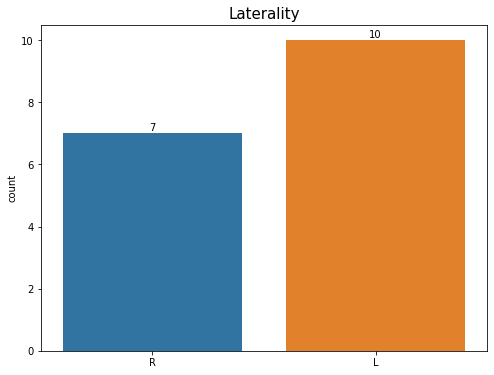

In [327]:
ax = sns.countplot(data = df, x = 'LATERALITY')
ax.set_title('Laterality', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+0.1, height, ha='center')

In [328]:
df = df.drop(['LATERALITY'], axis = 1)

In [329]:
df['QUINTILE_2015'].value_counts()

2                     7859
1 - least deprived    7601
3                     7156
4                     6325
5 - most deprived     5410
Name: QUINTILE_2015, dtype: int64

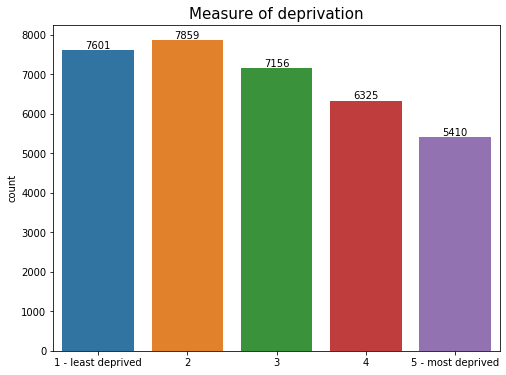

In [331]:
ax = sns.countplot(data = df, x = 'QUINTILE_2015', order = ['1 - least deprived', '2', '3', '4', '5 - most deprived'])
ax.set_title('Measure of deprivation', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+50, height, ha='center')

In [332]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['QUINTILE_2015'])
contingency

QUINTILE_2015,1 - least deprived,2,3,4,5 - most deprived
NEWVITALSTATUS,,,,,
A,5740,5940,5440,4729,4012
D,1861,1919,1716,1596,1398


In [333]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.12232000669432957


In [334]:
df['QUINTILE_2015'] = df['QUINTILE_2015'].astype(str)
df['DEPR1'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('1 - least deprived' in tumour for tumour in patient) else False)
df['DEPR2'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('2' in tumour for tumour in patient) else False)
df['DEPR3'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('3' in tumour for tumour in patient) else False)
df['DEPR4'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('4' in tumour for tumour in patient) else False)
df['DEPR5'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('5 - most deprived' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,DATE_FIRST_SURGERY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG,DIAG_TO_SURG_DAYS,DIAG_TO_SURG_MONTHS,DIAG_TO_SURG_YEARS,DIAG_TO_SURG_DAYS_MEDIAN,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,2013-07-05,4,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,120 days,120.0,3.942586,0.328549,120.0,False,False,False,True,False
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,2014-10-23,1 - least deprived,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,0 days,0.0,0.000000,0.000000,0.0,True,False,False,False,False
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,2014-01-08,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,0 days,0.0,0.000000,0.000000,0.0,False,False,True,False,False
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,NaT,1 - least deprived,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,NaT,NaN,NaN,NaN,0.0,True,False,False,False,False
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,2015-12-19,3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,29 days,29.0,0.952792,0.079399,29.0,False,False,True,False,False


In [335]:
df = df.drop(['QUINTILE_2015'], axis = 1)

In [336]:
df['VITALSTATUSDATE'] = pd.to_datetime(df['VITALSTATUSDATE'])
df['DIAGNOSISDATEBEST'] = pd.to_datetime(df['DIAGNOSISDATEBEST'])
df['CANCER_TIME'] = df['VITALSTATUSDATE'] - df['DIAGNOSISDATEBEST']
df['CANCER_DAYS'] = df['CANCER_TIME'] / np.timedelta64(1, 'D')
df['CANCER_MONTHS'] = df['CANCER_TIME'] / np.timedelta64(1, 'M')
df['CANCER_YEARS'] = df['CANCER_TIME'] / np.timedelta64(1, 'Y')
df[['VITALSTATUSDATE', 'DIAGNOSISDATEBEST', 'CANCER_DAYS', 'CANCER_MONTHS', 'CANCER_YEARS']].head()

,VITALSTATUSDATE,DIAGNOSISDATEBEST,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS
865,2017-01-14,2013-03-07,1409.0,46.292532,3.857711
990,2017-01-16,2014-10-23,816.0,26.809585,2.234132
1303,2017-01-16,2014-01-08,1104.0,36.271792,3.022649
1683,2017-01-16,2015-09-20,484.0,15.901764,1.325147
2079,2017-01-16,2015-11-20,423.0,13.897616,1.158135


In [337]:
df['CANCER_YEARS'].describe()

count    34351.000000
mean         2.083202
std          1.115067
min          0.000000
25%          1.256699
50%          2.078071
75%          3.008960
max          4.043889
Name: CANCER_YEARS, dtype: float64

In [339]:
df[['NEWVITALSTATUS','VITALSTATUSDATE', 'DIAGNOSISDATEBEST', 'CANCER_DAYS', 'CANCER_MONTHS', 'CANCER_YEARS']].sort_values(by = 'CANCER_DAYS', ascending=False).head(10)

,NEWVITALSTATUS,VITALSTATUSDATE,DIAGNOSISDATEBEST,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS
588079,A,2017-01-17,2013-01-01,1477.0,48.526664,4.043889
580979,A,2017-01-17,2013-01-02,1476.0,48.493809,4.041151
588957,A,2017-01-16,2013-01-01,1476.0,48.493809,4.041151
599192,A,2017-01-16,2013-01-01,1476.0,48.493809,4.041151
576490,A,2017-01-16,2013-01-01,1476.0,48.493809,4.041151
599794,A,2017-01-16,2013-01-01,1476.0,48.493809,4.041151
589961,A,2017-01-17,2013-01-02,1476.0,48.493809,4.041151
590501,A,2017-01-17,2013-01-02,1476.0,48.493809,4.041151
599292,A,2017-01-17,2013-01-02,1476.0,48.493809,4.041151
586707,A,2017-01-17,2013-01-02,1476.0,48.493809,4.041151


In [340]:
dead = df[df['NEWVITALSTATUS'] == 'D']
dead.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,DATE_FIRST_SURGERY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG,DIAG_TO_SURG_DAYS,DIAG_TO_SURG_MONTHS,DIAG_TO_SURG_YEARS,DIAG_TO_SURG_DAYS_MEDIAN,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_TIME,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS
875512,10090117,F,810090117,NaN,D,2016-07-04,10341838,2015-11-27,C18,2015-11-27,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,90.0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,0 days,0.0,0.0,0.0,0.0,False,False,True,False,False,220 days,220.0,7.228074,0.602340
875680,10124238,M,810124238,White British,D,2015-10-05,10344165,2014-04-07,C18,2014-04-07,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,87.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0 days,0.0,0.0,0.0,0.0,False,False,True,False,False,546 days,546.0,17.938767,1.494897
875774,10144045,F,810144045,Other white background,D,2016-09-26,10345482,2014-08-09,C18,2014-08-09,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,82.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0 days,0.0,0.0,0.0,0.0,True,False,False,False,False,779 days,779.0,25.593955,2.132830
875810,10150091,F,810150091,White British,D,2016-08-18,10345902,2015-10-29,C18,2015-10-29,1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,77.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0 days,0.0,0.0,0.0,0.0,False,False,False,True,False,294 days,294.0,9.659336,0.804945
875823,10152111,M,810152111,White British,D,2016-08-01,10346052,2014-06-17,C18,NaT,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,79.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaT,NaN,NaN,NaN,0.0,False,False,False,True,False,776 days,776.0,25.495390,2.124616


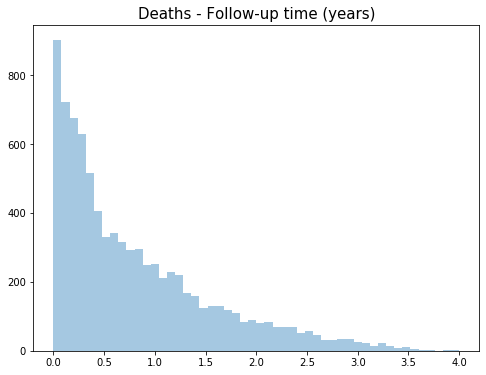

In [342]:
ax = sns.distplot(dead['CANCER_YEARS'], hist = True, kde = False, bins = 50)
ax.set_title('Deaths - Follow-up time (years)', fontsize=15)
ax.set_xlabel('');

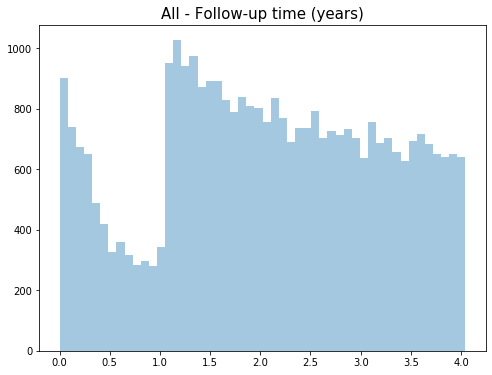

In [343]:
ax = sns.distplot(df['CANCER_YEARS'], hist = True, kde = False, bins = 50)
ax.set_title('All - Follow-up time (years)', fontsize=15)
ax.set_xlabel('');

In [345]:
df['CANCER_DAYS_MEDIAN'] = df.groupby('PATIENTID')['CANCER_DAYS'].transform(np.median)
df['CANCER_MONTHS_MEDIAN'] = df.groupby('PATIENTID')['CANCER_MONTHS'].transform(np.median)
df['CANCER_YEARS_MEDIAN'] = df.groupby('PATIENTID')['CANCER_YEARS'].transform(np.median)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,DATE_FIRST_SURGERY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG,DIAG_TO_SURG_DAYS,DIAG_TO_SURG_MONTHS,DIAG_TO_SURG_YEARS,DIAG_TO_SURG_DAYS_MEDIAN,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_TIME,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS,CANCER_DAYS_MEDIAN,CANCER_MONTHS_MEDIAN,CANCER_YEARS_MEDIAN
865,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,2013-07-05,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,120 days,120.0,3.942586,0.328549,120.0,False,False,False,True,False,1409 days,1409.0,46.292532,3.857711,1409.0,46.292532,3.857711
990,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,2014-10-23,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,0 days,0.0,0.000000,0.000000,0.0,True,False,False,False,False,816 days,816.0,26.809585,2.234132,816.0,26.809585,2.234132
1303,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,2014-01-08,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,0 days,0.0,0.000000,0.000000,0.0,False,False,True,False,False,1104 days,1104.0,36.271792,3.022649,1104.0,36.271792,3.022649
1683,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,NaT,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,NaT,NaN,NaN,NaN,0.0,True,False,False,False,False,484 days,484.0,15.901764,1.325147,484.0,15.901764,1.325147
2079,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,2015-12-19,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,29 days,29.0,0.952792,0.079399,29.0,False,False,True,False,False,423 days,423.0,13.897616,1.158135,423.0,13.897616,1.158135


In [346]:
df['CANCER_YEARS_MEDIAN'].describe()

count    34351.000000
mean         2.083197
std          1.113787
min          0.000000
25%          1.259437
50%          2.080809
75%          3.006222
max          4.043889
Name: CANCER_YEARS_MEDIAN, dtype: float64

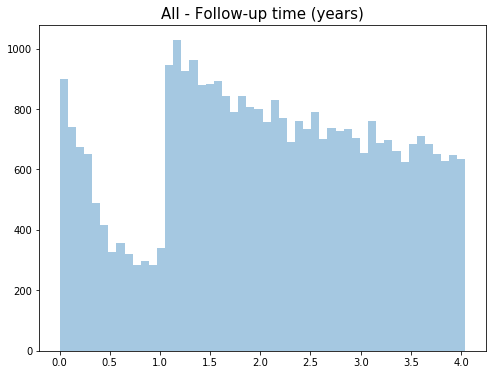

In [347]:
ax = sns.distplot(df['CANCER_YEARS_MEDIAN'], hist = True, kde = False, bins = 50)
ax.set_title('All - Follow-up time (years)', fontsize=15)
ax.set_xlabel('');

In [349]:
df.isna().sum()

PATIENTID                      0
SEX                            0
LINKNUMBER                     0
ETHNICITY                   2008
NEWVITALSTATUS                 0
VITALSTATUSDATE                0
TUMOURID                       0
DIAGNOSISDATEBEST              0
SITE_ICD10_O2_3CHAR            0
DATE_FIRST_SURGERY          5808
NUMBER_TUMOURS                 0
C180                           0
C181                           0
C182                           0
C183                           0
C184                           0
C185                           0
C186                           0
C187                           0
C188                           0
BEH_BENIGN                     0
BEH_MALIG                      0
BEH_MICINV                     0
BEH_INSITU                     0
BEH_UNCERT                     0
T0                             0
T1                             0
T2                             0
T3                             0
T4                             0
N0        

In [350]:
df.dtypes

PATIENTID                             int64
SEX                                category
LINKNUMBER                            int64
ETHNICITY                          category
NEWVITALSTATUS                     category
VITALSTATUSDATE              datetime64[ns]
TUMOURID                              int64
DIAGNOSISDATEBEST            datetime64[ns]
SITE_ICD10_O2_3CHAR                  object
DATE_FIRST_SURGERY           datetime64[ns]
NUMBER_TUMOURS                        int64
C180                                   bool
C181                                   bool
C182                                   bool
C183                                   bool
C184                                   bool
C185                                   bool
C186                                   bool
C187                                   bool
C188                                   bool
BEH_BENIGN                             bool
BEH_MALIG                              bool
BEH_MICINV                      

In [351]:
df.columns

Index(['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS',
       'VITALSTATUSDATE', 'TUMOURID', 'DIAGNOSISDATEBEST',
       'SITE_ICD10_O2_3CHAR', 'DATE_FIRST_SURGERY', 'NUMBER_TUMOURS', 'C180',
       'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188',
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT',
       'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1', 'STAGE0',
       'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3',
       'GRADE4', 'AGE_MEDIAN', 'L0801', 'L1001', 'L1701', 'L0201', 'L0401',
       'L1201', 'L0301', 'L0901', 'CURATIVE_TREAT', 'NONCURATIVE_TREAT',
       'NO_ACTIVE_TREAT', 'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4',
       'DIAG_TO_SURG', 'DIAG_TO_SURG_DAYS', 'DIAG_TO_SURG_MONTHS',
       'DIAG_TO_SURG_YEARS', 'DIAG_TO_SURG_DAYS_MEDIAN', 'DEPR1', 'DEPR2',
       'DEPR3', 'DEPR4', 'DEPR5', 'CANCER_TIME', 'CANCER_DAYS',
       'CANCER_MONTHS', 'CANCER_YEARS', 'CANCER_DAYS_MEDIAN',
  

In [352]:
columns_selected = ['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS', 'NUMBER_TUMOURS', 
       'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU','BEH_UNCERT', 
       'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1',
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4',
       'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEDIAN', 'L0801', 'L1001',
       'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901', 
       'CURATIVE_TREAT', 'NONCURATIVE_TREAT', 'NO_ACTIVE_TREAT', 
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 
       'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5', 
       'CANCER_YEARS_MEDIAN', 'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAGNOSISDATEBEST']
df = df[columns_selected]
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST
865,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07
990,10001128,F,810001128,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,2014-10-23
1303,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08
1683,10001901,M,810001901,NaN,A,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,1.325147,0.0,2015-09-20
2079,10002351,F,810002351,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,1.158135,29.0,2015-11-20


In [353]:
df.shape

(34351, 64)

In [354]:
df = df.drop_duplicates()
df.shape

(34062, 64)

In [355]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') > 1].count()

PATIENTID                   742
SEX                         742
LINKNUMBER                  742
ETHNICITY                   690
NEWVITALSTATUS              742
NUMBER_TUMOURS              742
C180                        742
C181                        742
C182                        742
C183                        742
C184                        742
C185                        742
C186                        742
C187                        742
C188                        742
BEH_BENIGN                  742
BEH_MALIG                   742
BEH_MICINV                  742
BEH_INSITU                  742
BEH_UNCERT                  742
T0                          742
T1                          742
T2                          742
T3                          742
T4                          742
N0                          742
N1                          742
N2                          742
N3                          742
M1                          742
STAGE0                      742
STAGE1  

In [356]:
df.isna().sum()

PATIENTID                      0
SEX                            0
LINKNUMBER                     0
ETHNICITY                   1986
NEWVITALSTATUS                 0
NUMBER_TUMOURS                 0
C180                           0
C181                           0
C182                           0
C183                           0
C184                           0
C185                           0
C186                           0
C187                           0
C188                           0
BEH_BENIGN                     0
BEH_MALIG                      0
BEH_MICINV                     0
BEH_INSITU                     0
BEH_UNCERT                     0
T0                             0
T1                             0
T2                             0
T3                             0
T4                             0
N0                             0
N1                             0
N2                             0
N3                             0
M1                             0
STAGE0    

In [357]:
df.to_pickle('./Data/avpat_avtum.pickle')